# K-Shortest Path using Dijkstra
Sia dato un grafo orientato e pesato *G=(V,A)* con *n* vertici, numerati da 1 a *n*, e con archi *(i,j)* di costo non negativo $c_{ij}$. Supponiamo di voler determinare il cammino *P* di costo minimo dal vertice *s* al vertice *d*.

L'algoritmo di **Dijkstra** si serve di una lista in cui vengono memorizzate le coppie vertice-costo $(i, l_i)$, dove *i* è un vertice raggiungibile tramite un cammino semplice con origine in *s* e di costo $l_i$.; per tenere traccia di tale cammino, viene memorizzato per ogni vertice *i* incluso in lista il vertice che lo precede nel cammino da *s* a *i*. 

La lista viene inizializzata inserendo la coppia $(s,0)$. Ad ogni iterazione viene estratta dalla lista la coppia $(i, l_i)$, con costo $l_i$ minore e e vengono presi in considerazione i vertici successivi a *i*, cioè i vertici *j* tali che $(i, j) \in A$; se il vertice *j* non è già presente, in lista viene inserita la coppia $(i, l_i + c_{ij})$, altrimenti si confronta il costo appena ottenuto con quello che era stato precedentemente calcolato e si mantiene quello minore.

 L'algoritmo termina quando il vertice della coppia estratta dalla lista è il vertice *d*. 



Di seguito viene presentato in dettaglio l'Algoritmo di **Dijkstra**.  

In [1]:
import numpy as np
import csv
from graph import Graph, K_Dijkstra, K_DijkstraV2
import matplotlib.pyplot as plt
import networkx as nx
from ipywidgets import interact, Dropdown, IntText, Checkbox
import pandas as pd
import os
import time 

![Dijsktra](./Images/dijkstra.png)

My python implementation:
```python
def Dijkstra(graph: Graph, start: int, destination: int):
    """_summary_

    Args:
        graph (Graph): Graph, where all the vertex are stored
        start (int): starting vertex
        destination (int): destination vertex

    Returns:
        list : path from start to destination
    """
    if graph.getVertex(start) == None or graph.getVertex(destination) == None:
        return []
    l_i = np.full(graph.getSize()+1, float('inf'))
    l_i[start] = 0
    Pred = np.full(graph.getSize()+1, -1)
    heap = []
    heapq.heapify(heap)
    heapq.heappush(heap, (0, start))
    curr_vertex = start
    while curr_vertex != destination and len(heap) > 0:
        cost, curr_vertex = heapq.heappop(heap)
        if curr_vertex != destination:
            for vertex_value, cost in graph.getVertex(curr_vertex).getneighbors().items():
                distance = l_i[curr_vertex] + cost
                if l_i[vertex_value.getVertex()] > distance:
                    l_i[vertex_value.getVertex()] = distance
                    heapq.heappush(heap, (l_i[vertex_value.getVertex()], vertex_value.getVertex()))
                    Pred[vertex_value.getVertex()] = curr_vertex
        
    def build_path():
        path = [destination]
        curr_vertex = destination
        while curr_vertex != start:
            curr_vertex = Pred[curr_vertex]
            path.append(curr_vertex)
        
        path.reverse()
        return path
        
    return build_path()
```

La funzione ``Heap.Empty()`` crea una lista vuota. La funzione ``Heap.Pop()`` estrae dalla lista la coppia $(j, l_j)$ con $l_j$ minore. La funzione ``Heap.Push``$(j, l_j)$ inserisce la coppia $(j, l_j)$ in lista; nel caso in lista sia già presente una coppia $(j, l_j'$) si mantiene solo il valore minore tra: $l_j$ e $l_j'$. 

In ``Pred(j)`` si memoriza il vertice che precede $j$ nel cammino di costo minore da $s$ a $j$ disponibile fino a quel momento; si tratta del vertice *i* in cui ci si trovava quando è stata aggiunta in lista la coppia $(j, l_j)$.  

Una volta terminato l'algoritmo l'ultima coppia estratta dalla lista sarà del tipo $(d,c)$ e si avrà ``Pred(d)=``$x_{r-1}$, cioè lo *shortest path* da *s* a *d* ha costo *c* e il vertice precedente a *d* in tale cammino è il vertice $x_{r-1}$; per determinare gli altri vertici del cammino si controlla prima ``Pred(``$x_{r-1}$``)`` e si prosegue poi a ritroso. 

Come già anticipato, l'Algoritmo di Dijkstra può anche essere modificato e ampliato per ottenere i primi *K* cammini meno costosi. In questo caso un elemento della lista è il vettore $(j, l, i, k')$: *j* rappresenta un nodo raggiungibile con un cammino di costo *l* a partire da *s* e il cui vertice precedente in tale cammino è il vertice i; $k'$ indica quale tra i cammini meno costosi è quello utilizzato per congiungere $s$ ad $i$. *Pred* diventa una matrice $n \times K$. L'assegnazione $Pred(i, k_i)=(h, k')$ indica che il $k_iesimo$ miglior cammino trovato da *s* a *i* è ottenuto unendo l'arco $(h, i)$ al $k'-esimo$ miglior cammino da *s* a *h*. L'algoritmo diventa:  

![K-Shortest-Path](./Images/k-shortest.png)

### Versione con grafo semplice
```python

def K_Dijkstra(graph: Graph, start: int, destination: int, k: int):
    """_summary_

    Args:
        graph (Graph): Graph, where all the vertex are stored
        start (int): starting Vertex
        destination (int): destination Vertex
        k (int): how many paths must be generated

    Returns:
        list(list): where all the k-paths are stored from start to destination 
    """
    paths = []
    heap = [(0, [], start)]
    while heap and len(paths) < k:
        cost, path, current_node = heapq.heappop(heap)
        path = path + [current_node]
        if current_node and current_node == destination:
            paths.append((path, cost))
        elif graph.getVertex(current_node):
            for neighbor, weight in graph.getVertex(current_node).getneighbors().items():
                if neighbor.getVertex() not in path:
                    heapq.heappush(heap, (cost + weight, path, neighbor.getVertex()))

    return paths
```



### Versione con Networkx
Seconda versione della funzione in cui si va ad utilizzare la libreria **networkx** per la gestione dell'intero grafo.

```python
def K_DijkstraV2(graph: nx.Graph, start: int, destination: int, k: int):
    """_summary_

    Args:
        graph (Graph): Graph, where all the vertex are stored
        start (int): starting Vertex
        destination (int): destination Vertex
        k (int): how many paths must be generated

    Returns:
        list(list): where all the k-paths are stored from start to destination 
    """
    paths = []
    heap = [(0, [], start)]
    while heap and len(paths) < k:
        cost, path, current_node = heapq.heappop(heap)
        path = path + [current_node]
        if current_node and current_node == destination:
            paths.append((path, cost))
        else:
            for neighbor in graph[current_node]:
                if neighbor not in path:
                    heapq.heappush(heap, (cost + graph.get_edge_data(current_node, neighbor)["weight"], path, neighbor))

    return paths
```

Come si può vedere la mia funzione presenta una differenza con lo pseudocodice, non viene utilizzata la lista dei *predecessori*, **PRED**. La scelta che mi ha portato a compiere questa modifica è stata per un motivo di pura *efficienza*. 

Se avessi dovuto utilizzare anche la lista dei *predecessori*, mi sarei dovuto occupare poi di costruire le soluzioni tramite questa *lista*, andando a sprecare tempo e memoria per realizzare tutte e *K* le shortest path, invece nella mia versione le *path* sono già salvate all'interno della *heap*, in questo modo, una volta raggiunto il nodo *destinazione*, inserisco già tutta la *path* all'interno della lista di output. 

## File
All'interno di questa lista sono presenti tutti i file in cui sono salvati i *grafi*. 

In [2]:
file = os.listdir("./graphs/")
file_list = ["./graphs/"+f for f in file]

In [3]:
def fromPathToGraph(path:list):
    G = nx.Graph()
    for index in range(0, len(path)-1):
        G.add_edge(path[index], path[index+1])
    return G

# Vista del grafo
All'interno di questo progetto è presente una cartella denominata *graphs*, al cui interno sono presenti un insieme di file *csv*. Tutto il grafo viene salvato come: *nodo1, nodo2, costo*. Attraverso questa prima funzione è possibile **visualizzare** il grafo scelto tramite il *dropdown*, selezionando poi la *checkbox* verrà visualizzato l'intero grafo. Si faccia attenzione che nel caso in cui il grafo sia **molto grande** tale funzione potrebbe bloccarsi a causa della dimensione del *grafo* stesso.

In [4]:

@interact(file=Dropdown(options=file_list, description='Graph:'),
                    show=Checkbox(description="Plot the graph"))
def selectGraph(file, show): 
    df = pd.read_csv(file, names=["Node1", "Node2", "weight"])
    G = nx.Graph()
    Graphtype = nx.Graph()
    G = nx.from_pandas_edgelist(df, source="Node1", target="Node2", edge_attr='weight', create_using=Graphtype)
    if(show):
        nx.draw_networkx(G, with_labels=True)
    
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

interactive(children=(Dropdown(description='Graph:', options=('./graphs/graph27.csv', './graphs/graph28.csv', …

## Visualizzare le K path
Con l'utilizzo della funzione principale di questo progetto, *K-Shortest-Path* è possibile generare esattamente **K** *shortest path* dal nodo **A** al nodo **B**. Sono state definite due funzioni principali:
- **plotWithImage**: utilizzando questa funzione verrà visualizzato per ogni *path* l'intero grafo in cui saranno colorati tutti i nodi da **A** a **B**. 
- **plotWithoutImage**: utilizzando questa funzione verrà solamente visualizzata stringa in cui sono presenti tutti i nodi dal nodo **A** al nodo **B**.

Queste funzioni vengono eseguite per ogni *path* sulle totali **K** generate.

In [11]:
colors = ["red", "orange", "yellow", "green", "cyan", "violet"]
l = len(colors)
def plotWithImage(paths:list, G):
    k=1
    for path, cost in paths:
        fig, ax = plt.subplots()
        ax.set_title(f"K={k} cost: {cost}")
        nx.draw_networkx(G, node_color=[colors[k % l] if node in path else "blue" for node in G], with_labels=True, ax=ax)
        print(f"K:{k} path {path} cost: {cost}")
        k+=1
        
        
def plotWithoutImage(paths:list):
    k = 1
    for path, cost in paths:
        print(f"K:{k} path {path} cost: {cost}")
        k+=1
        

# K Paths versione 1
Con la prima versione della mia funzione è possibile calcolare le *K* shortest path dal nodo **START** al nodo **DESTINATION**. La funzione lavora su una classe *Graph* realizzata da me, tale classe è scritta all'interno del file *graph.py*:
1. La classe **Graph** in cui è salvato interamente l'insieme di tutti i vertici, tutti i vertici sono salvati in un *dizionario* con questo formato *{vertice, [lista vicini]}*.
2. La classe **Vertex** che gestisce il singolo *nodo* del nostro grafo, all'interno di questa classe è presente un *dizionario* all'interno del quale sono messi salvati i singoli vincini con i relativi *costi*, *{vicino, costo}*. 

Sono state utilizzate come strutture dati dei *dizionari* in quanto ho la necessità di avere accessi efficienti ad ogni singolo nodo, in modo da poter accedere e ricavare subito tutti i *vicini* di ogni singolo *nodo* del mio grafo. Se avessi utilizzato altre strutture dati, ad esempio una semplice *lista* l'accesso ad ogni singolo nodo mi sarebbe costato in media *O(n)*, mentre attraverso l'impiego di un *dizionario* l'accesso ad ogni singolo *vertice* avviene in tempo *O(1)*. 

In [12]:
@interact(start=IntText(description='Start:'),
          destination=IntText(description='Destination:'),
          k=IntText(description='K:', value=1, min=1),
          images=Checkbox(description="Plot the graph"),
          file=Dropdown(options=file_list, description='Graph:'))
def viewKDijkstra(file, start, destination, k, images):
    if start < 0 or destination < 0 or k < 0:
        print("One of the value is negative, please check the input")
        return
    df = pd.read_csv(file, header=0, names=['Start', 'Destination', 'Cost'])
    G = nx.Graph()
    df = pd.read_csv(file, header=0, names=['Start', 'Destination', 'Cost'])
    G.add_nodes_from(df['Start'].unique())

    for index, row in df.iterrows():
        G.add_edge(row['Start'], row['Destination'], weight=row['Cost'])

    graph = Graph()
    with open(file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            v1 = int(row[0])
            v2 = int(row[1])
            cost = int(row[2])
            graph.addArch(v1, v2, cost)
    
    paths = K_Dijkstra(graph, start=start, destination=destination, k=k)
    if len(paths) > 0:
        if images:
            plotWithImage(paths, G)
        else:
            plotWithoutImage(paths)
    else:
        print(f"The path does not exists, make sure that START: {start} and DESTINATION: {destination} exist inside the graph")

interactive(children=(Dropdown(description='Graph:', options=('./graphs/graph8.csv', './graphs/graph5.csv', '.…

In [169]:
kt = 10
data_1 = []
data_2 = []


# Performance Versione 1
Performance fornite dal dalla prima versione del mio algoritmo, si può scegliere in maniera attiva quante *paths* generare. La performance consiste nel visualizzare *quanto tempo* viene impiegato per generare da *1* a *K* paths.

In [182]:

def plotPerformance():
    x = []
    y = []
    for i,f in enumerate(file_list):
        graph = Graph()
        s = float('inf')        
        d = -1
        with open(f, 'r') as file:
            reader = csv.reader(file)
            for row in reader:
                v1 = int(row[0])
                v2 = int(row[1])
                cost = int(row[2])
                s = min([v1, v2, s])
                d = max([v1, v2, d])
                graph.addArch(v1, v2, cost)

        start_t = time.time()
        _ = K_Dijkstra(graph, start=s, destination=d, k=kt)
        end_t = time.time()
        x.append(i)
        y.append(end_t - start_t)
        
    norm = plt.Normalize(vmin=min(y), vmax=max(y))  # Normalize the data range
    cmap = plt.get_cmap('rainbow')  # Choose the desired colormap
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
    fig.autofmt_xdate(rotation=45)
    ax1.plot(x, y, 'bo-', linewidth=2.0)
    for i in range(len(x)):
        ax2.plot(x[i], y[i],marker='o', color=cmap(norm(y[i])))
    ax2.plot(x, y, '-')
    ax2.set_yscale('log')
    ax1.grid()
    ax2.grid()
    
    
    ax1.set_title("Performance")
    ax2.set_title("Performance Logaritmiche")
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(sm)
    
    print(f"min time: {min(y)} max time: {max(y)}")

    plt.show()
    return y

    

/tmp/ipykernel_26956/3559295551.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


min time: 7.867813110351562e-06 max time: 0.07958745956420898


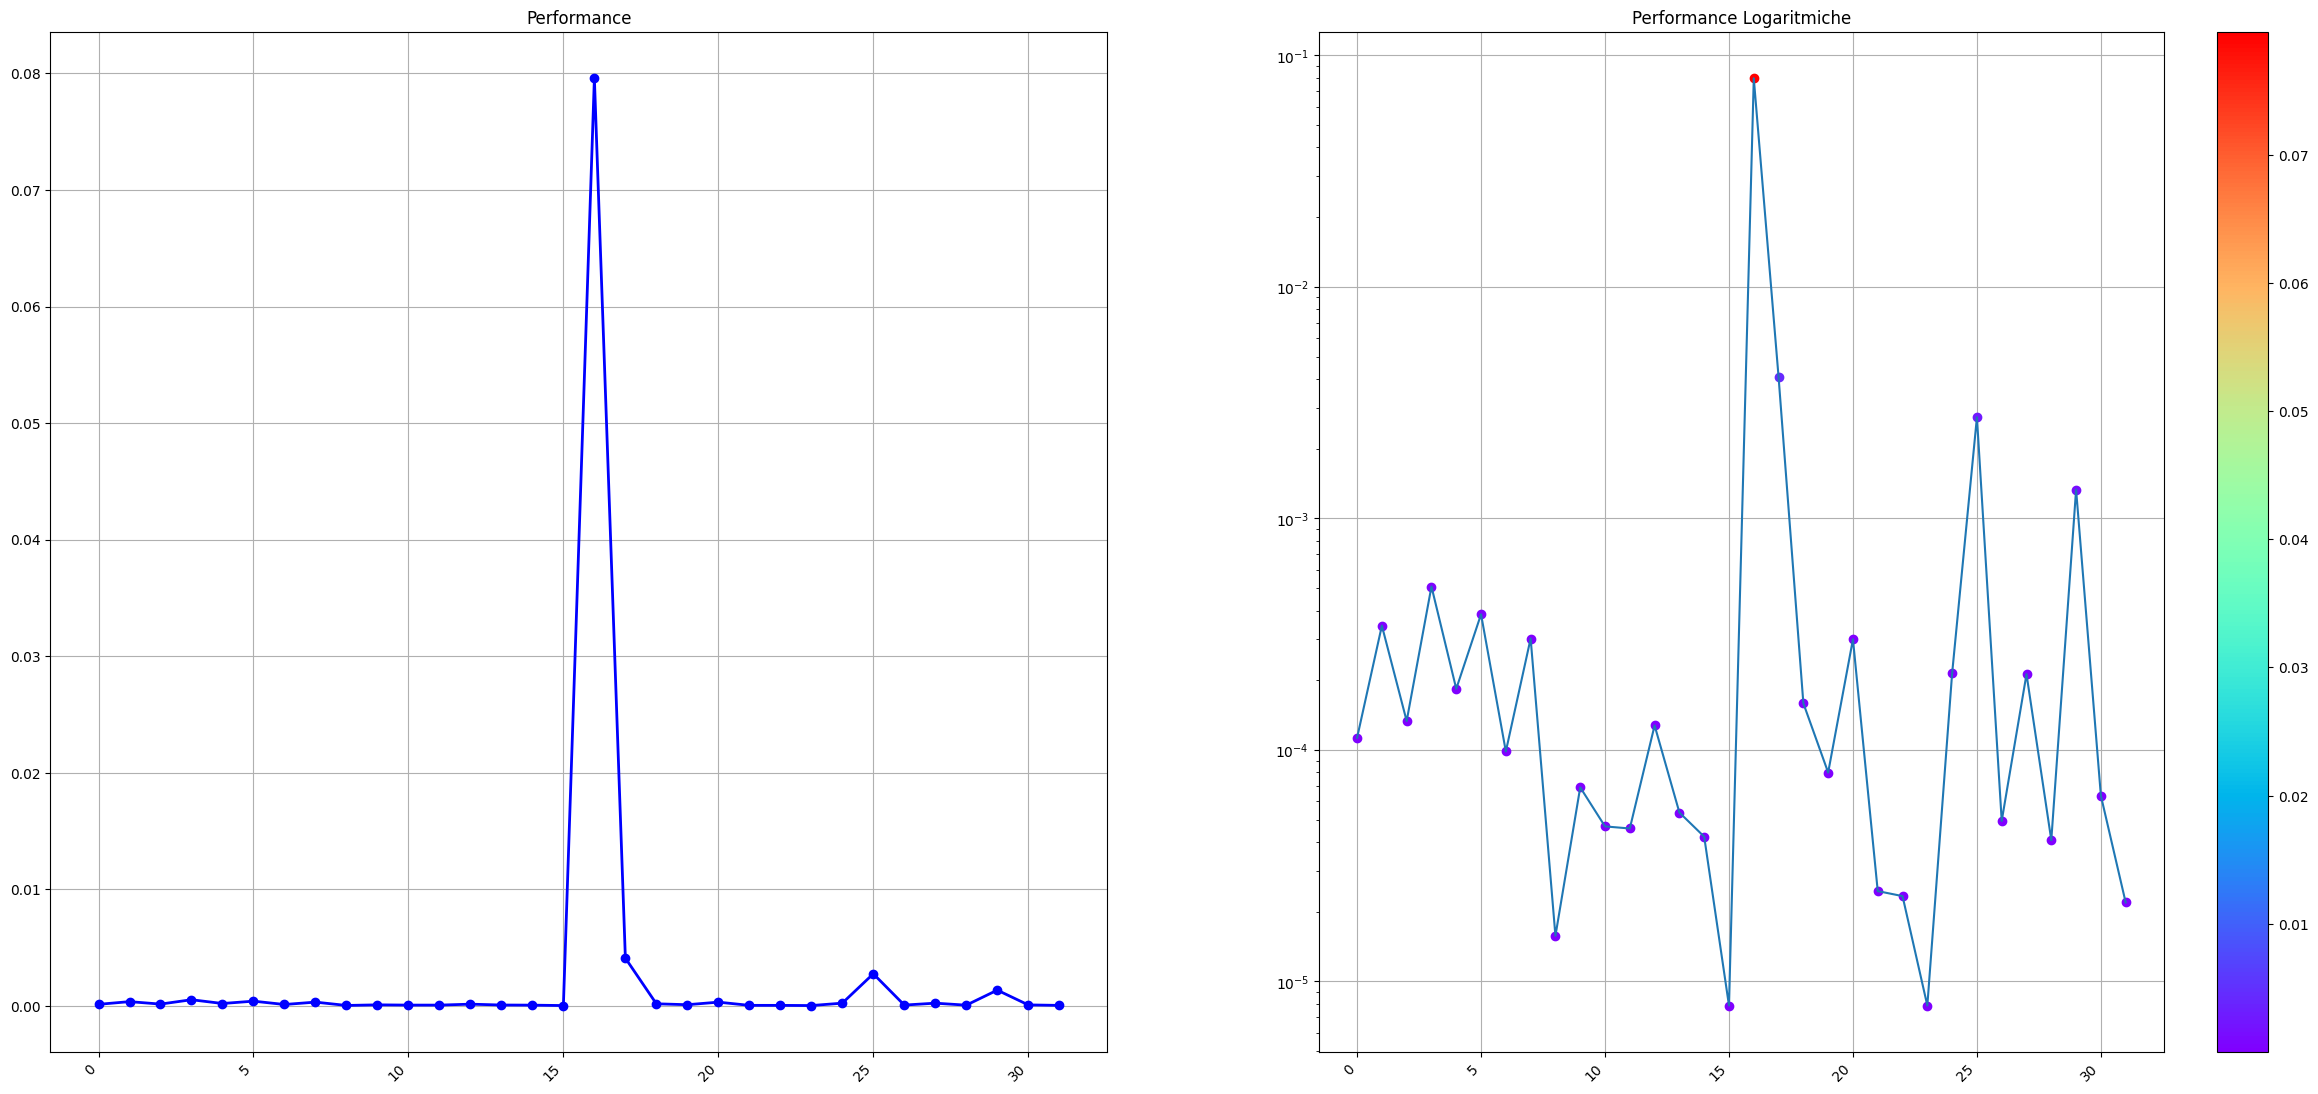

In [183]:
data_1 = plotPerformance()

# Performance Versione 2
Nella versione 2 del mio algoritmo, al posto di utilizzare la classe *Graph* da me creata ho deciso di utilizzare quella fornita dalla libreria **networkx**. Questa libreria, il cui sviluppo è partito dal *2003*, è realizzata per gestire dei *grafi*. Attraverso l'impiego di questa libreria ho voluto realizzare una versione due della mia funzione, andando ad utilizzare questa libreria per capire quanto più efficiente sarebbe diventata la mia funzione. 

In [184]:


def plotPerformanceV2():
    x = []
    y = []
    for i, file in enumerate(file_list):
        df = pd.read_csv(file, names=["Node1", "Node2", "weight"])
        G = nx.Graph()
        Graphtype = nx.Graph()
        G = nx.from_pandas_edgelist(df, source="Node1", target="Node2", edge_attr='weight', create_using=Graphtype)

        s = df["Node1"].min()
        d = df["Node2"].max()

        start_t = time.time()
        _ = K_DijkstraV2(G, start=s, destination=d, k=kt)
        end_t = time.time()
        x.append(i)
        y.append(end_t - start_t)

    norm = plt.Normalize(vmin=min(y), vmax=max(y))  # Normalize the data range
    cmap = plt.get_cmap('rainbow')  # Choose the desired colormap
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 15))
    fig.autofmt_xdate(rotation=45)
    ax1.plot(x, y, 'bo-', linewidth=2.0)
    for i in range(len(x)):
        ax2.plot(x[i], y[i],marker='o', color=cmap(norm(y[i])))
    ax2.plot(x, y, '-')
    ax2.set_yscale('log')
    
    ax1.grid()
    ax2.grid()
    
    ax1.set_title("Performance")
    ax2.set_title("Performance Logaritmiche")
    
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(sm)
    
    print(f"min time: {min(y)} max time: {max(y)}")
    plt.show()
    return y

    

/tmp/ipykernel_26956/3567969647.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


min time: 8.916854858398438e-05 max time: 0.12113833427429199


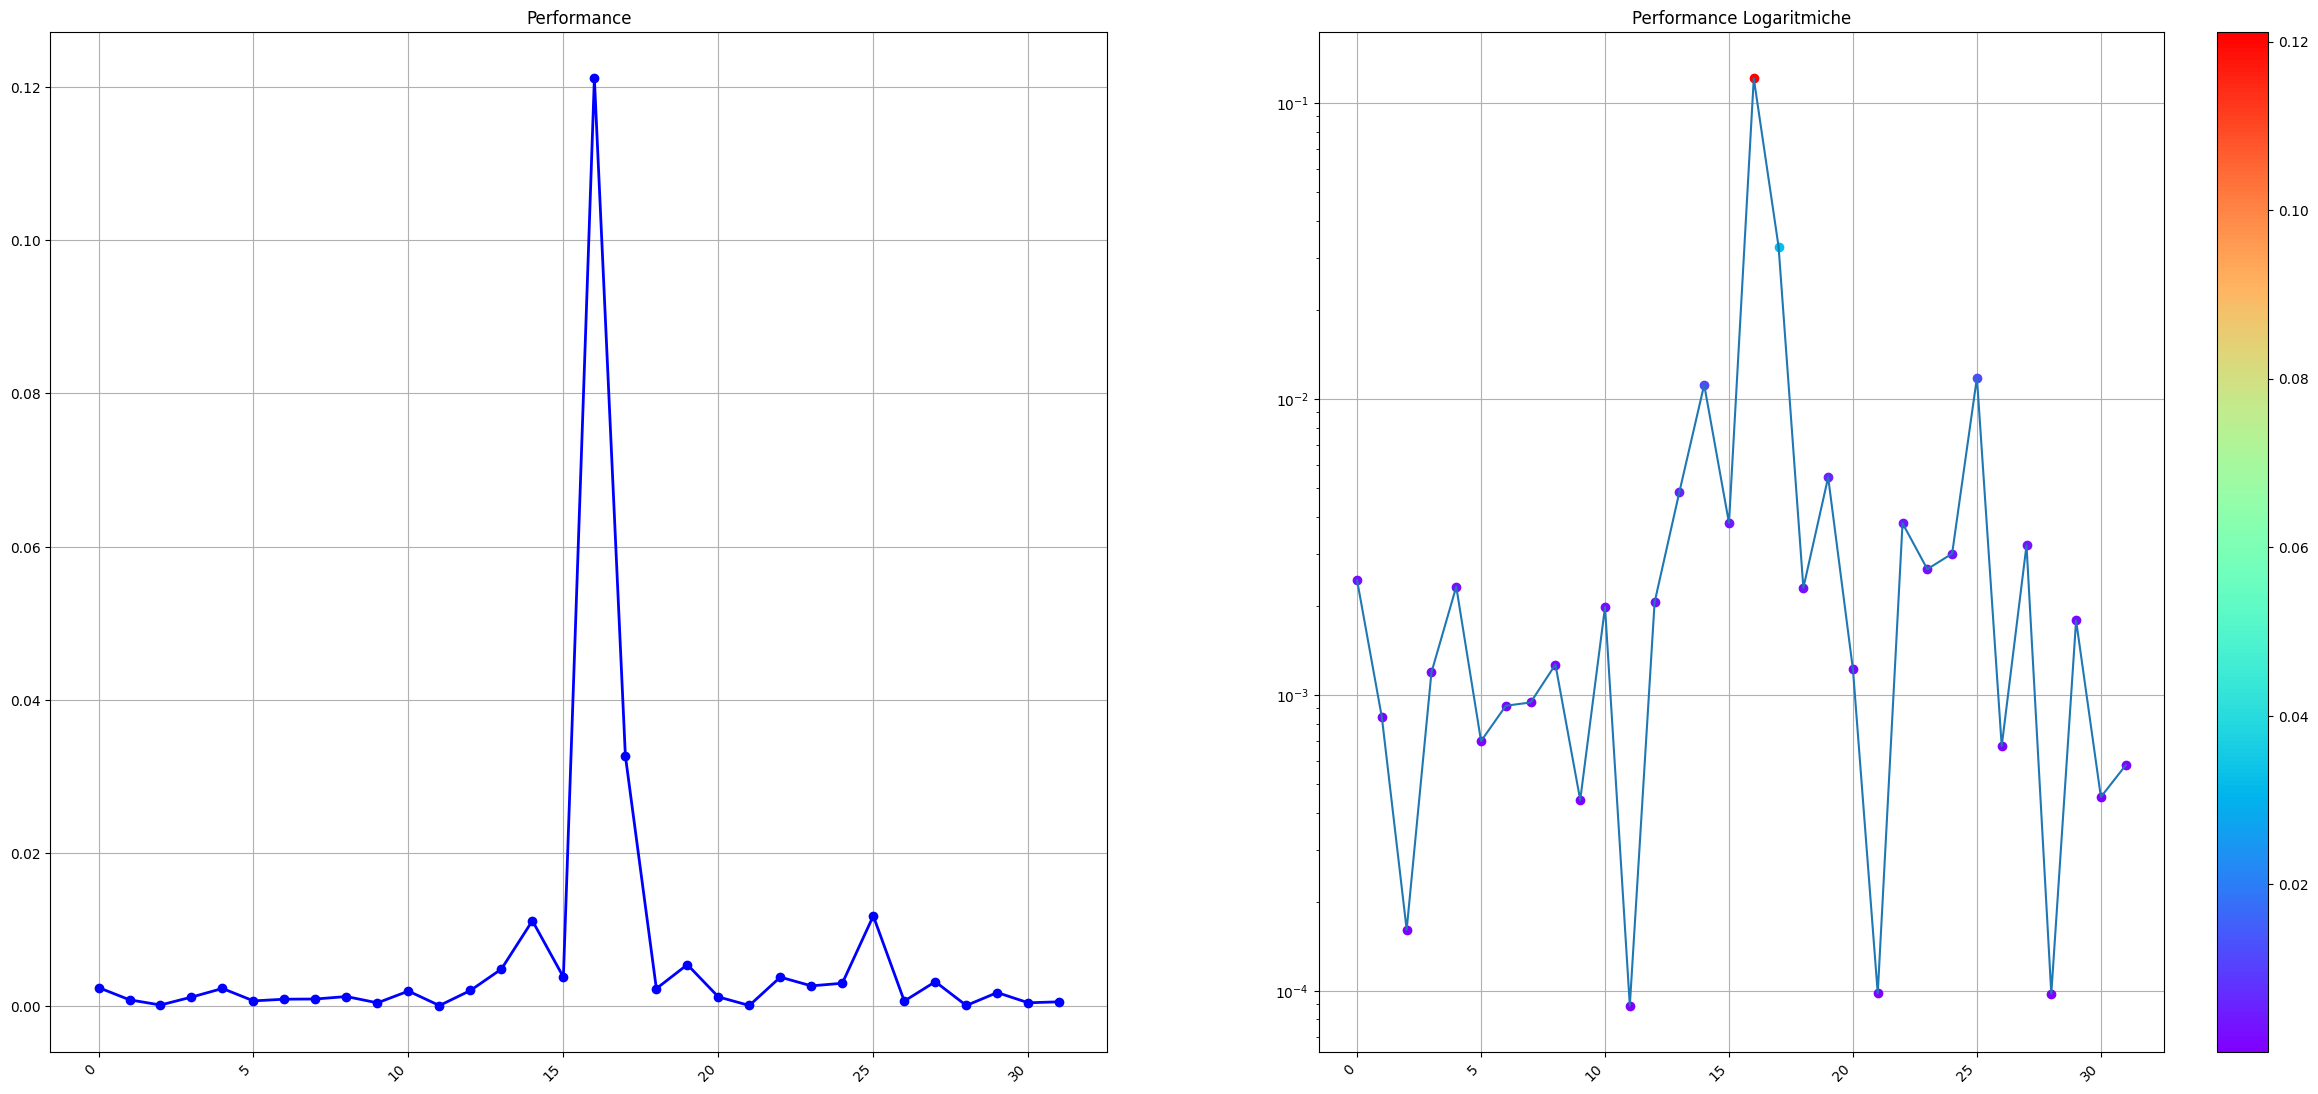

In [185]:
data_2 = plotPerformanceV2()

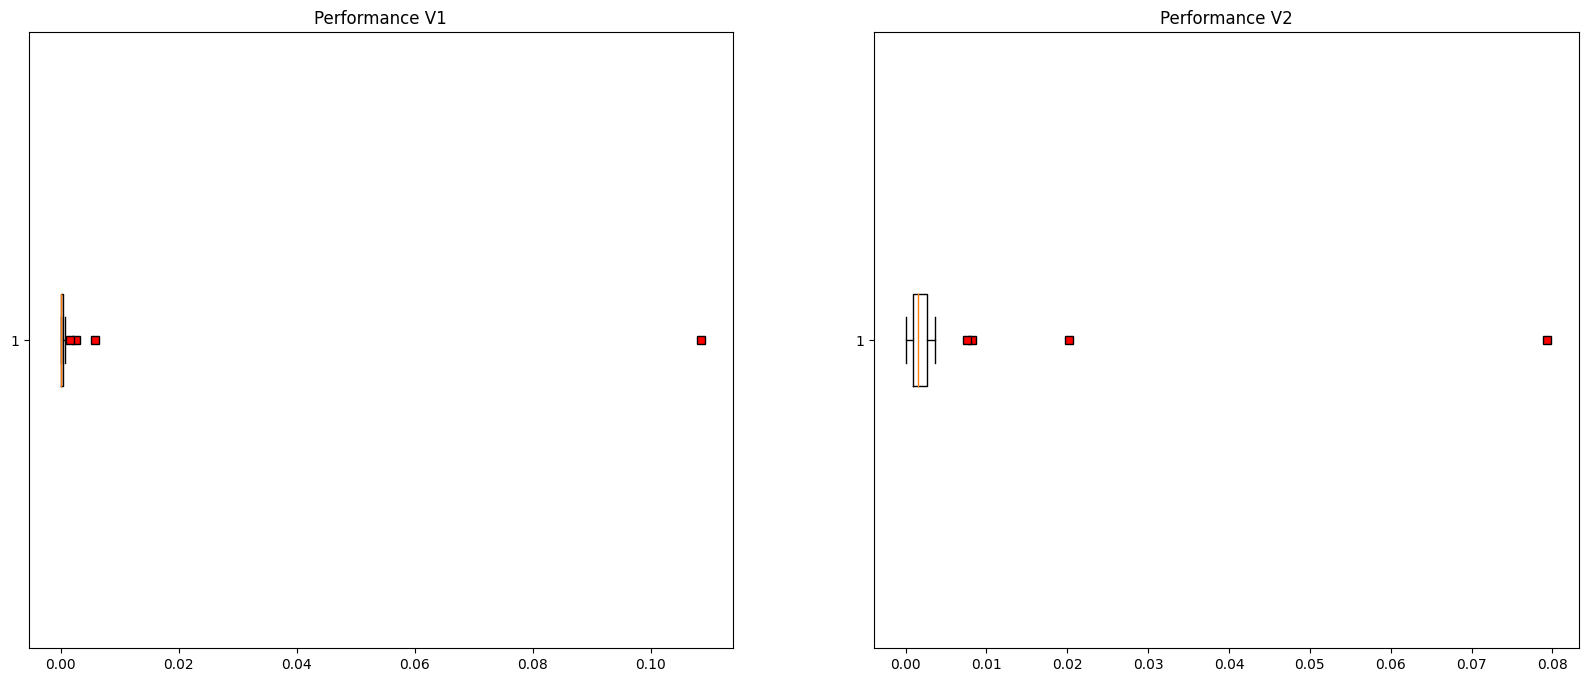

In [66]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
red_square = dict(markerfacecolor='r', marker='s')
ax1.set_title("Performance V1")
ax2.set_title("Performance V2")
ax1.boxplot(data_1, flierprops=red_square, vert=False, whis=0.75)
ax2.boxplot(data_2, flierprops=red_square, vert=False, whis=0.75)
plt.show()